<a href="https://colab.research.google.com/github/AmineAAZELAARAB/Pedestrian_NonPedestrian_Classification/blob/main/Pedestrian_and_non_Pedestrian_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -p dataset/  http://www.lookingatpeople.com/data/Daimler/pami06-munder-gavrila/DC-ped-dataset_base.tar.gz

--2023-11-12 18:23:23--  http://dataset/
Resolving dataset (dataset)... failed: Name or service not known.
wget: unable to resolve host address ‘dataset’
--2023-11-12 18:23:24--  http://www.lookingatpeople.com/data/Daimler/pami06-munder-gavrila/DC-ped-dataset_base.tar.gz
Resolving www.lookingatpeople.com (www.lookingatpeople.com)... 92.205.55.171, 2a00:1169:103:3340::
Connecting to www.lookingatpeople.com (www.lookingatpeople.com)|92.205.55.171|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30640226 (29M) [application/x-gzip]
Saving to: ‘www.lookingatpeople.com/data/Daimler/pami06-munder-gavrila/DC-ped-dataset_base.tar.gz’

www.lookingatpeople 100%[===================>]  29.22M  12.4MB/s    in 2.3s    

2023-11-12 18:23:26 (12.4 MB/s) - ‘www.lookingatpeople.com/data/Daimler/pami06-munder-gavrila/DC-ped-dataset_base.tar.gz’ saved [30640226/30640226]

FINISHED --2023-11-12 18:23:26--
Total wall clock time: 2.7s
Downloaded: 1 files, 29M in 2.3s (12.4 MB/s)


In [2]:
!tar -xvf  /content/www.lookingatpeople.com/data/Daimler/pami06-munder-gavrila/DC-ped-dataset_base.tar.gz

Streaming output truncated to the last 5000 lines.
T2/non-ped_examples/img_00019.pgm
T2/non-ped_examples/img_03167.pgm
T2/non-ped_examples/img_04442.pgm
T2/non-ped_examples/img_00707.pgm
T2/non-ped_examples/img_03855.pgm
T2/non-ped_examples/img_01992.pgm
T2/non-ped_examples/img_03168.pgm
T2/non-ped_examples/img_04443.pgm
T2/non-ped_examples/img_02580.pgm
T2/non-ped_examples/img_00708.pgm
T2/non-ped_examples/img_03856.pgm
T2/non-ped_examples/img_01993.pgm
T2/non-ped_examples/img_00020.pgm
T2/non-ped_examples/img_03169.pgm
T2/non-ped_examples/img_04444.pgm
T2/non-ped_examples/img_02581.pgm
T2/non-ped_examples/img_00709.pgm
T2/non-ped_examples/img_03857.pgm
T2/non-ped_examples/img_01994.pgm
T2/non-ped_examples/img_00021.pgm
T2/non-ped_examples/img_04445.pgm
T2/non-ped_examples/img_02582.pgm
T2/non-ped_examples/img_03858.pgm
T2/non-ped_examples/img_01995.pgm
T2/non-ped_examples/img_00022.pgm
T2/non-ped_examples/img_03170.pgm
T2/non-ped_examples/img_04446.pgm
T2/non-ped_examples/img_02583.p

## Project Description :
We have the dataset who's path is the following "/content/www.lookingatpeople.com/data/Daimler/pami06-munder-gavrila/DC-ped-dataset_base.tar.gz".

It contains two types of images : pedestrians and  non pedestrians.

We want to create two matrices one called X and the other Y.

X contains the vectors that we get from applying the hog feature descriptor.

Y contains the labels 0 for pedestrian and 1 for non pedestrian.

Once we get the X and Y matrices we want to split them into training and testing data.

Finally we'll use the support vector machine classification algorithm to obtain a model capable of classifying pedestrians and non pedestrians images.

In [3]:
#importing the necessary libraries
import numpy as np
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline
import os

(36, 18)


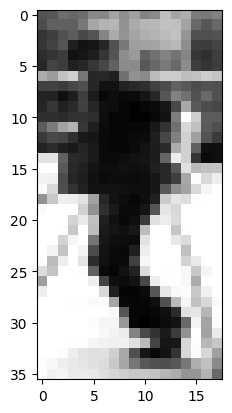

In [4]:
img = cv.imread('T2/ped_examples/img_02370.pgm',0)
plt.imshow(img,cmap='gray')
print(img.shape)

In [5]:
resized_img=cv.resize(img,(64,128))
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=False)

print(fd.shape)

(3780,)


<ipython-input-5-6c5f02f14830>:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


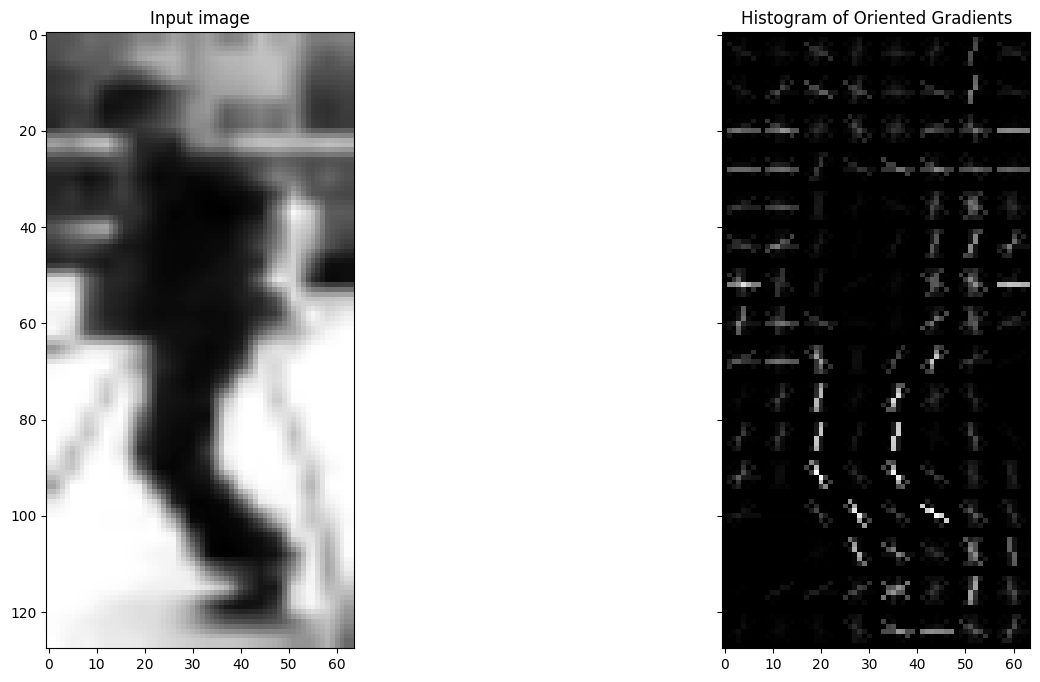

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

ax1.imshow(resized_img, cmap=plt.cm.gray)
ax1.set_title('Input image')


ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [7]:
# the paths to our dataset
dataset_path = "/content/www.lookingatpeople.com/data/Daimler/pami06-munder-gavrila/DC-ped-dataset_base.tar.gz"
pedestrian_examples_path = "T2/ped_examples/"
non_pedestrian_examples_path = "T2/non-ped_examples/"

# Initializing  empty lists to store HOG features and labels
X = []
Y = []

# Defining the HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# Function to extract HOG features and labels
def extract_hog_features_and_labels(path, label):
    for filename in os.listdir(path):
        if filename.endswith(".pgm"):
            img = cv.imread(os.path.join(path, filename), 0)  # Read image in grayscale
            resized_img = cv.resize(img, (64, 128))
            fd = hog(resized_img, orientations=orientations, pixels_per_cell=pixels_per_cell,
                     cells_per_block=cells_per_block, multichannel=False)
            X.append(fd)
            Y.append(label)

# Extract HOG features and labels for pedestrians (label 0)
extract_hog_features_and_labels(pedestrian_examples_path, 0)

# Extract HOG features and labels for non-pedestrians (label 1)
extract_hog_features_and_labels(non_pedestrian_examples_path, 1)

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

<ipython-input-7-8a8750fec314>:21: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd = hog(resized_img, orientations=orientations, pixels_per_cell=pixels_per_cell,


Support Vector Machines (SVM) are widely used for classification tasks, and they can be effective for pedestrian detection using HOG features.

The choice of the kernel can have a significant impact on the performance of the SVM. In our model, we'll use a linear kernel, but we could also want to experiment with other kernels such as 'rbf' (Radial basis function) or 'poly' (Polynomial) to see which one works best for our data.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating an SVM classifier
svm_classifier = SVC(kernel='linear')

# Trainning the classifier
svm_classifier.fit(X_train, Y_train)

# Making predictions on the test set
Y_pred = svm_classifier.predict(X_test)

# Evaluating the performance
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Displaying additional metrics
print(classification_report(Y_test, Y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       968
           1       0.96      0.97      0.96       992

    accuracy                           0.96      1960
   macro avg       0.96      0.96      0.96      1960
weighted avg       0.96      0.96      0.96      1960



Our SVM model using a linear kernel is performing well with an accuracy of 96%, and it seems to have balanced performance for both classes based on precision, recall, and F1-Score. These metrics provide a more detailed view of our model's performance than accuracy alone.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating an SVM classifier
svm_classifier = SVC(kernel='rbf')

# Trainning the classifier
svm_classifier.fit(X_train, Y_train)

# Making predictions on the test set
Y_pred = svm_classifier.predict(X_test)

# Evaluating the performance
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Displaying additional metrics
print(classification_report(Y_test, Y_pred))


Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       968
           1       0.98      0.98      0.98       992

    accuracy                           0.98      1960
   macro avg       0.98      0.98      0.98      1960
weighted avg       0.98      0.98      0.98      1960



Our SVM model using a radial basis function kernel is performing well with an accuracy of 98%, and it seems to have balanced performance for both classes based on precision, recall, and F1-Score. These metrics provide a more detailed view of our model's performance than accuracy alone.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating an SVM classifier
svm_classifier = SVC(kernel='poly')

# Trainning the classifier
svm_classifier.fit(X_train, Y_train)

# Making predictions on the test set
Y_pred = svm_classifier.predict(X_test)

# Evaluating the performance
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Displaying additional metrics
print(classification_report(Y_test, Y_pred))

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       968
           1       0.98      0.99      0.99       992

    accuracy                           0.99      1960
   macro avg       0.99      0.99      0.99      1960
weighted avg       0.99      0.99      0.99      1960



Our SVM model using a Polynomial kernel is performing well with an accuracy of 99%, and it seems to have balanced performance for both classes based on precision, recall, and F1-Score. These metrics provide a more detailed view of our model's performance than accuracy alone.